In [3]:
from spyral_utils.plot import Histogrammer
from spyral_utils.nuclear import NuclearDataMap

import polars as pl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [4]:
# file_path = "C:\\Users\\schaeffe\\Desktop\\B11_sim\\B_11_12_56_MeV_106_MeV_beam\\B_11_12_56_106_Mev_beam_kine.parquet" #10B(d,p)11B*[12.56 MeV]
# file_path = "C:\\Users\\schaeffe\\Desktop\\B11_sim\\B_9_12_56_MeV_106_MeV_beam\\B_9_12_56_MeV_106_MeV_beambeam_kine.parquet" #10B(d,t)9B*[12.56 MeV]
# file_path = "C:\\Users\\schaeffe\\Desktop\\B11_sim\\B_9_2_79_MeV_106_MeV_beam\\B_9_2_79_MeV_106_MeV_beam_kine.parquet" #10B(d,t)9B*[2.79 MeV]
# file_path = "c:\\Users\\schaeffe\\Desktop\\B11_sim\\B9_2_79_a_Li5__106_MeV_beam\\B9_2_79_a_Li5__106_MeV_beam_kine.parquet" #10B(d,t)9B*[2.79 MeV] , 9B* -> a + 5Li, 5Li -> a + p
# file_path = 'C:\\Users\\schaeffe\\Desktop\\B11_sim\\B9_2_79_8Be_p__106_MeV_beam\\B9_2_79_8Be_p__106_MeV_beam_kine.parquet'
# file_path = "c:\\Users\\schaeffe\\Desktop\\B11_sim\\B_11_15_29_MeV_106_MeV_beam\\B_11_15_29_MeV_106_MeV_beam_kin.parquet"
# file_path = "c:\\Users\\schaeffe\\Desktop\\e20009_analysis-output\\B11_sim\\B_11_14_56_t_Be8_MeV_106_MeV_beam\\B_11_14_56_t_Be8_MeV_106_MeV_beam_kine.parquet"
file_path = "c:\\Users\\schaeffe\\Desktop\\e20009_analysis-output\\B11_sim\\B_11_12_56_t_Be8_MeV_106_MeV_beam\\B_11_12_56_t_Be8_MeV_106_MeV_beam_kine.parquet"
# file_path = "c:\\Users\\schaeffe\\Desktop\\B11_sim\\B_11_12_56_t_Be8_MeV_106_MeV_beam_B_11_cm_restricted\\B_11_12_56_t_Be8_MeV_106_MeV_beam_B_11_cm_restricted.parquet"
# file_path = "c:\\Users\\schaeffe\\Desktop\\B11_sim\\B_11_12_56_t_Be8_MeV_106_MeV_beam_p_cm_restricted\\B_11_12_56_t_Be8_MeV_106_MeV_beam_p_cm_restricted.parquet"
df = pl.scan_parquet(file_path)
# df = df.collect()
print(df)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

Parquet SCAN [c:\Users\schaeffe\Desktop\e20009_analysis-output\B11_sim\B_11_12_56_t_Be8_MeV_106_MeV_beam\B_11_12_56_t_Be8_MeV_106_MeV_beam_kine.parquet]
PROJECT */11 COLUMNS


In [5]:
nuclear_map = NuclearDataMap()
proton = nuclear_map.get_data(1, 1)
triton = nuclear_map.get_data(1, 3)
print(triton.mass)
print(proton.mass)

2808.9211231278296
938.2720758437141


In [14]:
# df = df.filter(pl.col("isotope") == "1H").collect() # protons
# df = df.filter(pl.col("isotope") == "3H").collect() # tritons
# df = df.collect()
# print(df)

In [6]:
# df = df.filter(pl.col("isotope") == "1H").collect() # protons
df = df.filter(
    (pl.col("isotope") == "1H") 
    # &  
    # (pl.col("vertex_z") > 0.3) &  
    # (pl.col("vertex_z") < 0.5)
).collect()  # Tritons
# df = df.filter((pl.col("z_vertex") > 0.3) & (pl.col("z_vertex") < 0.5))

# df = df.collect()

print(df)

# Kin_en =  df.select('energy').to_numpy().flatten() - triton.mass
Kin_en =  df.select('energy').to_numpy().flatten() - proton.mass

px =  df.select('px').to_numpy().flatten()
py =  df.select('py').to_numpy().flatten()
pz =  df.select('pz').to_numpy().flatten()

p = (px **2 + py **2 + pz **2) **(1/2)
polar = np.arccos(pz/ p) * (180/np.pi)

shape: (100_000, 11)
┌───────┬─────┬─────┬─────────┬───┬────────────┬───────────┬───────────┬──────────┐
│ event ┆ Z   ┆ A   ┆ isotope ┆ … ┆ pz         ┆ vertex_x  ┆ vertex_y  ┆ vertex_z │
│ ---   ┆ --- ┆ --- ┆ ---     ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---      │
│ i64   ┆ i32 ┆ i32 ┆ str     ┆   ┆ f64        ┆ f64       ┆ f64       ┆ f64      │
╞═══════╪═════╪═════╪═════════╪═══╪════════════╪═══════════╪═══════════╪══════════╡
│ 0     ┆ 1   ┆ 1   ┆ 1H      ┆ … ┆ 197.896712 ┆ -0.001878 ┆ 0.004291  ┆ 0.89511  │
│ 1     ┆ 1   ┆ 1   ┆ 1H      ┆ … ┆ 260.516844 ┆ -0.004473 ┆ -0.001505 ┆ 0.133636 │
│ 2     ┆ 1   ┆ 1   ┆ 1H      ┆ … ┆ 185.050987 ┆ 0.01019   ┆ 0.008887  ┆ 0.79269  │
│ 3     ┆ 1   ┆ 1   ┆ 1H      ┆ … ┆ 206.181799 ┆ 0.000671  ┆ 0.004083  ┆ 0.438591 │
│ 4     ┆ 1   ┆ 1   ┆ 1H      ┆ … ┆ -24.941785 ┆ 0.000869  ┆ 0.005136  ┆ 0.207052 │
│ …     ┆ …   ┆ …   ┆ …       ┆ … ┆ …          ┆ …         ┆ …         ┆ …        │
│ 99995 ┆ 1   ┆ 1   ┆ 1H      ┆ … ┆ 106.972988 ┆ -0.001

In [7]:
print(df.columns)


['event', 'Z', 'A', 'isotope', 'energy', 'px', 'py', 'pz', 'vertex_x', 'vertex_y', 'vertex_z']


In [8]:
print(max(Kin_en))

40.512133820361555


In [9]:
# energy = df.select('energy').to_numpy().flatten()

In [10]:
grammer = Histogrammer()

grammer.add_hist2d("kinematics", (720, 400), ((0.0, 180.0), (0.0, 100.0)))
grammer.fill_hist2d('kinematics', polar, Kin_en)

True

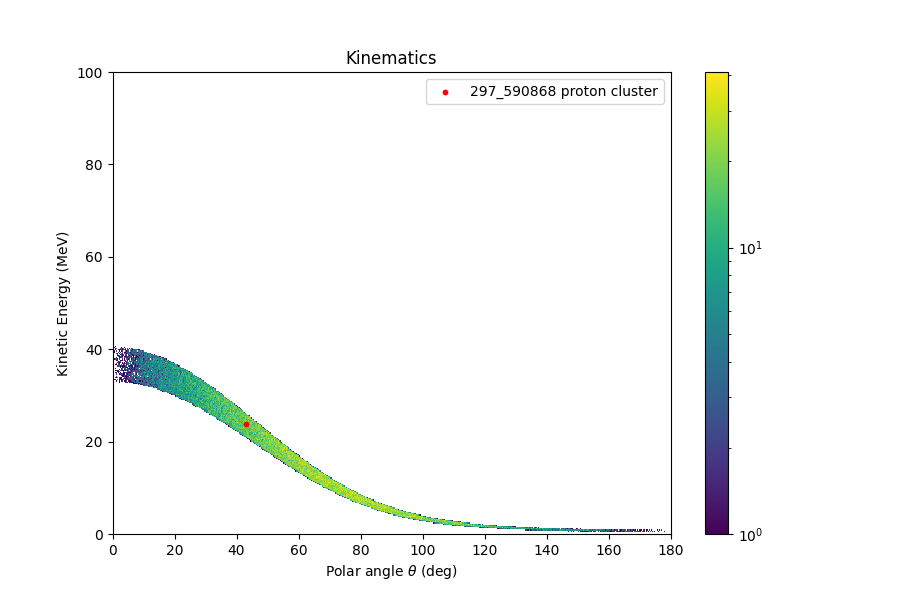

In [18]:
kine = grammer.get_hist2d("kinematics")
fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(kine.x_bins, kine.y_bins, kine.counts, norm='log')
# plt.scatter(41.34345948563042, 5.540410563675323, color='red', label='122_543783 proton cluster', s=10)
# plt.scatter(29.37061312551441, 34.64525322541914, color='red', label='122_543783 triton cluster', s=10)
plt.scatter(43.21768540983862, 23.866806444079543, color='red', label='297_590868 proton cluster', s=10)
# plt.scatter(18.514054824244493, 19.437792778146104, color='red', label='297_590868 triton cluster', s=10)
# plt.scatter(16.098060035687855, 22.543934787417584, color='red', label='256_597527 triton cluster', s=10)
# plt.scatter(79.59149881632108, 8.203589449573087, color="red", label='256_597527 proton cluster', s=5)
plt.legend()
fig.colorbar(mesh, ax=ax)
ax.set_title("Kinematics")
ax.set_xlabel("Polar angle $\\theta$ (deg)")
ax.set_ylabel("Kinetic Energy (MeV)")
fig.set_figheight(6.0)
fig.set_figwidth(9.0)


In [16]:
print(type(kine.counts))
print(kine.counts)
np.save("proton_kine_counts.npy", kine.counts)

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
